# 함수

## 000n 형태 만들기

In [119]:
def plus_0s(value):
    
    if len(value) == 4:
        pass
    elif len(value) == 3:
        value = '0' + value
    elif len(value) == 2:
        value = '00' + value
    else:
        value = '000' + value
    
    return value

## split_hour_minute

In [123]:
def split_hour_minute(data):
    
    # hrmt가 들어간 컬럼 리스트 가져오기
    hrmt_list = list(data.columns[data.columns.str.contains('hrmt')])
    
    for i in hrmt_list:
        # 컬럼별 round(), str 변환
        data[i] = tem[i].apply(round)
        data[i] = data[i].astype(str)
        
        # 유효자리 4자리
        data[i] = data[i].apply(plus_0s)
        
        # hr. mt 분리
        hr_name = i[:-2]
        mt_name = i[:-4] + 'mt'
        data[hr_name] = data[i].str.slice(start = 0, stop = 2)
        data[mt_name] = data[i].str.slice(start = 2, stop = 4)
    
    return data

# aws_ta

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
pd.set_option('display.max_columns', 30)

In [124]:
tem = pd.read_csv('../data/22.savedata_weather/aws_ta.csv')
tem.head()

,tma,stn_id,avg_ta,avg_ta_calc_dtnb,max_ta,max_ta_hrmt,min_ta,min_ta_hrmt,ta_calp_dtnb,rtm_ta,rtm_ta_hrmt
0,2016-04-01 00:00:00,515,8.0,60.0,8.9,2328.0,7.3,2354.0,60.0,7.5,0.0
1,2016-04-01 00:00:00,616,7.2,60.0,7.8,2303.0,6.6,2337.0,60.0,6.8,0.0
2,2016-04-01 00:00:00,634,8.7,60.0,9.1,2326.0,8.2,0.0,60.0,8.2,0.0
3,2016-04-01 00:00:00,637,7.1,60.0,8.1,2309.0,6.4,2323.0,60.0,7.2,0.0
4,2016-04-01 01:00:00,515,6.6,60.0,7.7,3.0,5.8,54.0,60.0,5.9,100.0


In [125]:
def multi_distplot(data):
    
    col_n = data.shape[1] - 2
    plt.figure(figsize=(15,20))

    for i in range(col_n):
        plt.subplot(6, 4, i+1)
        sns.distplot(data.iloc[:,i+2], kde=False)

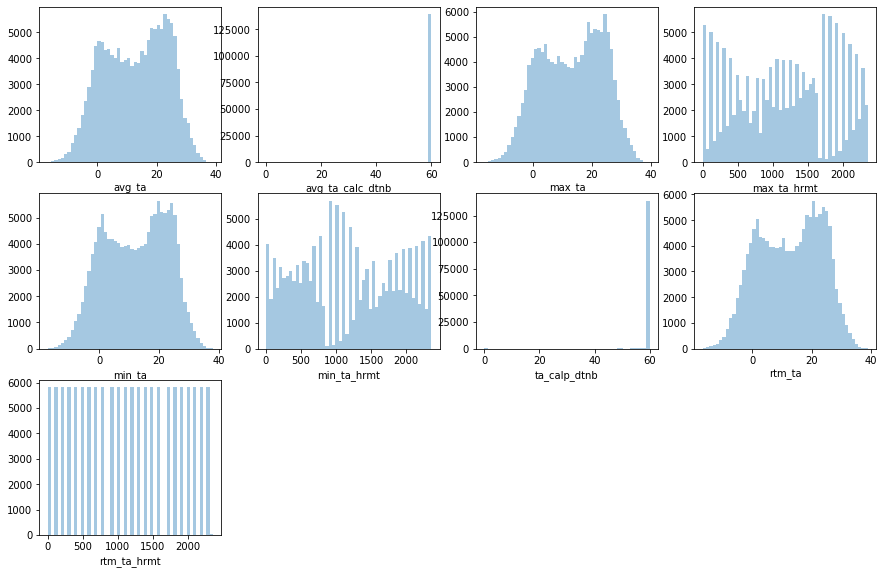

In [126]:
multi_distplot(tem)

In [127]:
tem['avg_ta_calc_dtnb'].value_counts()

60.0    137588
59.0      1426
58.0       207
57.0       102
0.0         69
56.0        64
55.0        50
54.0        32
53.0        22
49.0        18
48.0        17
50.0        16
45.0        14
52.0        12
46.0        10
41.0         9
39.0         8
51.0         8
31.0         8
44.0         8
43.0         7
30.0         7
23.0         7
47.0         7
2.0          6
42.0         6
35.0         5
27.0         5
9.0          5
37.0         5
1.0          5
29.0         5
3.0          4
10.0         4
11.0         4
20.0         4
33.0         4
34.0         4
25.0         3
19.0         3
5.0          3
21.0         3
4.0          3
40.0         3
14.0         2
28.0         2
16.0         2
13.0         2
32.0         2
22.0         2
26.0         1
36.0         1
6.0          1
38.0         1
8.0          1
12.0         1
Name: avg_ta_calc_dtnb, dtype: int64

In [128]:
tem['max_ta_hrmt'].unique()

array([2328., 2303., 2326., ..., 1948., 2053.,  810.])

In [129]:
tem.head()

,tma,stn_id,avg_ta,avg_ta_calc_dtnb,max_ta,max_ta_hrmt,min_ta,min_ta_hrmt,ta_calp_dtnb,rtm_ta,rtm_ta_hrmt
0,2016-04-01 00:00:00,515,8.0,60.0,8.9,2328.0,7.3,2354.0,60.0,7.5,0.0
1,2016-04-01 00:00:00,616,7.2,60.0,7.8,2303.0,6.6,2337.0,60.0,6.8,0.0
2,2016-04-01 00:00:00,634,8.7,60.0,9.1,2326.0,8.2,0.0,60.0,8.2,0.0
3,2016-04-01 00:00:00,637,7.1,60.0,8.1,2309.0,6.4,2323.0,60.0,7.2,0.0
4,2016-04-01 01:00:00,515,6.6,60.0,7.7,3.0,5.8,54.0,60.0,5.9,100.0


In [130]:
tem = split_hour_minute(tem)
tem.head()

,tma,stn_id,avg_ta,avg_ta_calc_dtnb,max_ta,max_ta_hrmt,min_ta,min_ta_hrmt,ta_calp_dtnb,rtm_ta,rtm_ta_hrmt,max_ta_hr,max_ta_mt,min_ta_hr,min_ta_mt,rtm_ta_hr,rtm_ta_mt
0,2016-04-01 00:00:00,515,8.0,60.0,8.9,2328,7.3,2354,60.0,7.5,0000,23,28,23,54,00,00
1,2016-04-01 00:00:00,616,7.2,60.0,7.8,2303,6.6,2337,60.0,6.8,0000,23,03,23,37,00,00
2,2016-04-01 00:00:00,634,8.7,60.0,9.1,2326,8.2,0000,60.0,8.2,0000,23,26,00,00,00,00
3,2016-04-01 00:00:00,637,7.1,60.0,8.1,2309,6.4,2323,60.0,7.2,0000,23,09,23,23,00,00
4,2016-04-01 01:00:00,515,6.6,60.0,7.7,0003,5.8,0054,60.0,5.9,0100,00,03,00,54,01,00


In [68]:
tem['max_ta_hr'].value_counts()

10    9389
20    9000
11    6817
12    6662
21    6633
      ... 
27      42
39      42
46      41
48      36
49      35
Name: max_ta_hr, Length: 84, dtype: int64

# aws_wind

In [10]:
wind = pd.read_csv('../data/22.savedata_weather/aws_wind.csv')
wind.head()

,tma,stn_id,avg_ws,mix_ws,mix_wd,max_ws,max_ws_hrmt,avg_ws_calc_dtnb,max_wd,max_ws_wd,avg_mi1_ws,max_mi1_ws,max_mi1_ws_hrmt,mi1_ws_calc_dtnb,max_mi1_ws_wd,max_ins_ws,max_ins_ws_hrmt,max_ins_ws_wd,ins_ws_calp_dtnb,rtm_mi10_avg_ws,rtm_mi10_avg_wd,rtm_mi10_avg_ws_hrmt,ws_calp_dtnb
0,2016-04-01 00:00:00,515,0.5,0.5,99.3,0.9,2328.0,60,90.0,94.0,0.6,1.1,2322.0,60,84.2,1.4,2322.0,98.4,60,0.8,112.5,0.0,60
1,2016-04-01 00:00:00,616,0.3,0.3,166.0,0.7,2333.0,60,157.5,152.3,0.3,1.0,2330.0,60,141.4,1.1,2330.0,137.8,60,0.3,0.0,0.0,60
2,2016-04-01 00:00:00,634,0.4,0.3,127.3,1.1,2309.0,60,112.5,119.6,0.3,1.2,2305.0,60,115.4,1.2,2304.0,120.9,60,0.0,0.0,0.0,60
3,2016-04-01 00:00:00,637,0.7,0.6,210.6,0.9,2303.0,60,225.0,147.3,0.7,1.1,0.0,60,216.9,1.1,2351.0,213.8,60,0.9,225.2,0.0,60
4,2016-04-01 01:00:00,515,0.5,0.2,141.4,0.9,1.0,60,112.5,110.3,0.4,1.0,12.0,60,121.4,1.2,13.0,115.3,60,0.2,0.0,100.0,60


In [5]:
wind.columns

Index(['tma', 'stn_id', 'avg_ws', 'mix_ws', 'mix_wd', 'max_ws', 'max_ws_hrmt',
       'avg_ws_calc_dtnb', 'max_wd', 'max_ws_wd', 'avg_mi1_ws', 'max_mi1_ws',
       'max_mi1_ws_hrmt', 'mi1_ws_calc_dtnb', 'max_mi1_ws_wd', 'max_ins_ws',
       'max_ins_ws_hrmt', 'max_ins_ws_wd', 'ins_ws_calp_dtnb',
       'rtm_mi10_avg_ws', 'rtm_mi10_avg_wd', 'rtm_mi10_avg_ws_hrmt',
       'ws_calp_dtnb'],
      dtype='object')

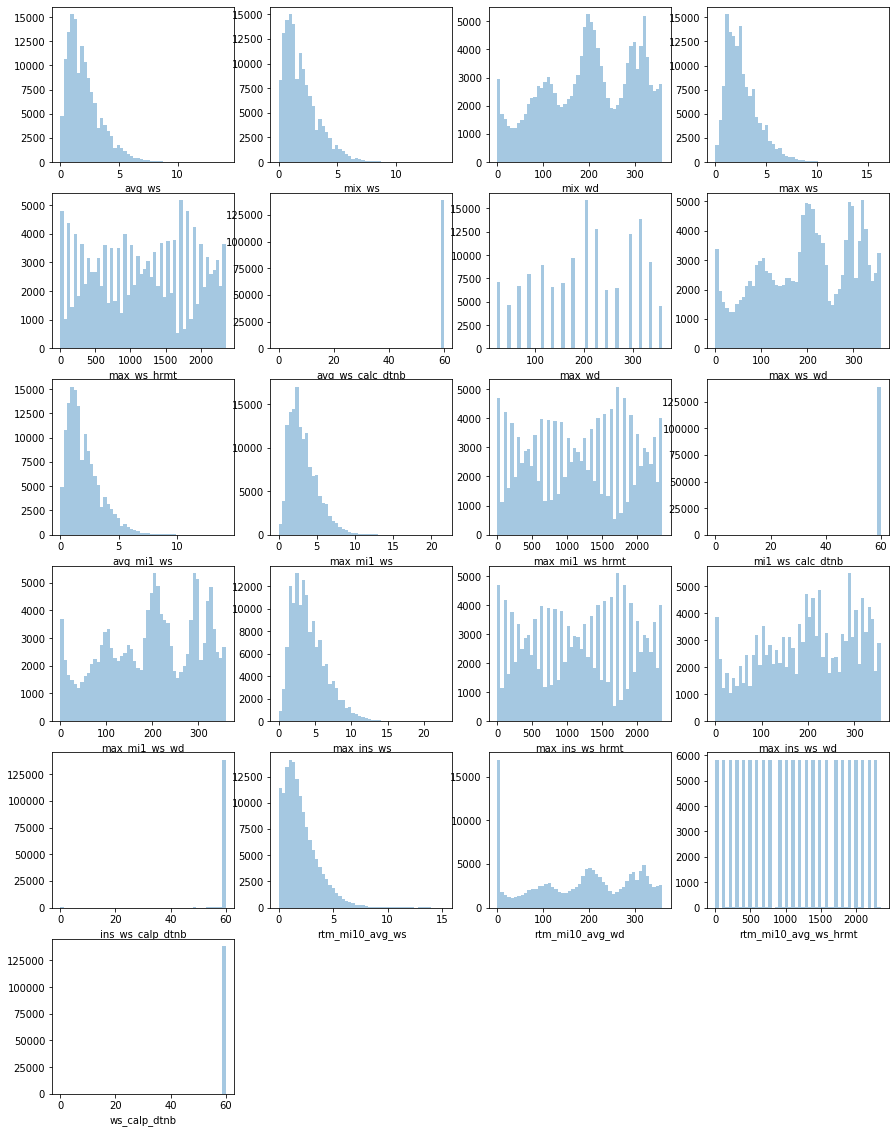

In [12]:
multi_distplot(wind)

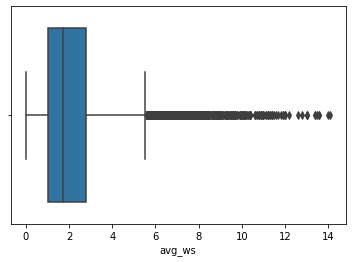

In [13]:
sns.boxplot(wind['avg_ws'])

# aws_